<a href="https://colab.research.google.com/github/Sathwik-parimi-07/woc/blob/main/polynomial_reg_fun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp


In [ ]:
data =pd.read_csv(r'/content/drive/MyDrive/woc drive/polynomial_regression_train.csv')

In [ ]:
data = (data - data.mean())/data.std()

In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         48000 non-null  float64
 1   Feature_1  48000 non-null  float64
 2   Feature_2  48000 non-null  float64
 3   Feature_3  48000 non-null  float64
 4   Feature_4  48000 non-null  float64
 5   Feature_5  48000 non-null  float64
 6   Target     48000 non-null  float64
dtypes: float64(7)
memory usage: 2.6 MB


,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,-1.731997,-0.271458,0.850615,-1.080839,0.363526,-0.301199,0.107086
1,-1.731925,-0.336490,-1.021567,0.531296,0.046763,0.600729,-0.016961
2,-1.731852,-1.085796,-0.119573,-0.003585,0.421652,-0.206247,0.073303
3,-1.731780,-0.384559,-1.493354,-0.087116,0.775618,0.280888,-0.217256
4,-1.731708,-1.506180,1.687317,1.103569,-0.411579,0.915984,-1.565257


In [ ]:
data.describe()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
count,4.800000e+04,4.800000e+04,4.800000e+04,4.800000e+04,4.800000e+04,4.800000e+04,4.800000e+04
mean,-3.789561e-17,9.325873e-18,-3.759955e-17,-3.215946e-17,1.480297e-17,-1.598721e-17,6.217249e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.731997e+00,-1.742810e+00,-1.732329e+00,-1.735269e+00,-1.732220e+00,-1.730809e+00,-1.237213e+01
25%,-8.659983e-01,-8.655547e-01,-8.671055e-01,-8.627531e-01,-8.670125e-01,-8.707606e-01,-3.841146e-01
50%,0.000000e+00,9.882506e-03,-1.764944e-03,2.619075e-03,3.149584e-03,8.645808e-04,3.463697e-03
75%,8.659983e-01,8.659267e-01,8.635133e-01,8.669746e-01,8.632330e-01,8.628138e-01,3.244534e-01
max,1.731997e+00,1.717317e+00,1.734173e+00,1.730945e+00,1.730793e+00,1.739866e+00,9.950649e+00


In [ ]:
data2=data.drop(columns=['ID'],axis=1)

In [ ]:
m , n = data.shape
n=n-2   #since i have removed column 'ID' and 'labels'(not needed to be used)

In [ ]:
X=data2.iloc[:,:-1]
y=data2.iloc[:,-1]

In [ ]:
y = y.to_frame()
y.shape

(48000, 1)

In [ ]:
X_sq = np.multiply(X,X)
print(X_sq.shape)
X_cube=np.multiply(X,X_sq)
print(X_cube.shape)

(48000, 5)
(48000, 5)


In [ ]:
X = np.concatenate((X,X_sq),axis = 1)
print(X.shape)

(48000, 10)


In [ ]:
X=np.concatenate((X,X_cube),axis=1)
print(X.shape)

(48000, 15)


In [ ]:
m=X.shape[0] #due to RAM issue

In [ ]:
z = np.ones((m,1))  #dont forget to replace m after here
print(z.shape)

(48000, 1)


In [ ]:
X = np.concatenate((z,X),axis = 1)
print(X.shape)


(48000, 16)


In [ ]:
m,n = X.shape
n = n -1
print(m,n)
print(m,n)

48000 15
48000 15


In [ ]:
theta = np.zeros((n+1,1))
b=0
print(theta.shape)

(16, 1)


In [ ]:
import matplotlib.pyplot as plt

cost_history = []

# Gradient Descent Loop
for i in range(40000):
    h = np.dot(X, theta)+b  # Prediction
    er = h - y  # Error term
    delta = (np.dot(X.T, er)) / m  # Gradient
    theta = theta - 0.001 * delta  # Update theta
    J = (1 / (2 * m)) * (np.sum(np.multiply(er, er)))  # Cost function


    cost_history.append(J)


print(f"Final cost (J): {J}")
print(f"Optimized theta: {theta}")

Final cost (J): Target    0.37993
dtype: float64
Optimized theta: [[ 0.02578469]
 [ 0.08953212]
 [ 0.0074886 ]
 [ 0.07082571]
 [ 0.0379053 ]
 [-0.02987144]
 [ 0.3804946 ]
 [-0.1978739 ]
 [ 0.0812509 ]
 [-0.04171157]
 [-0.24755517]
 [ 0.01874279]
 [ 0.00160821]
 [ 0.03734203]
 [ 0.01949   ]
 [ 0.02667653]]


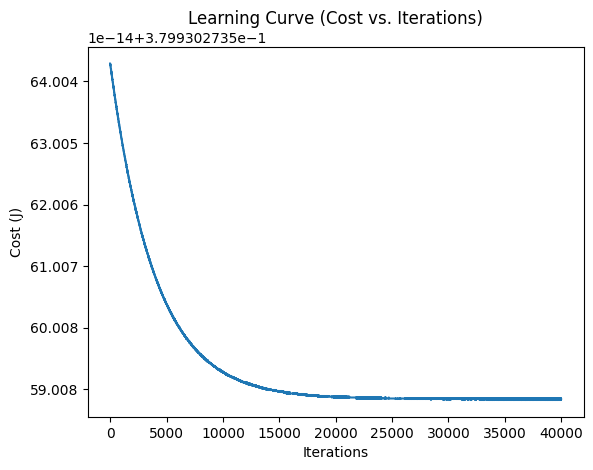

In [ ]:
# Plot the learning curve
plt.plot(range(40000), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.title('Learning Curve (Cost vs. Iterations)')
plt.show()

In [ ]:
##testing the data

In [ ]:
theta

array([[ 0.02578414],
       [ 0.08953168],
       [ 0.00748849],
       [ 0.07082538],
       [ 0.03790517],
       [-0.02987117],
       [ 0.38049471],
       [-0.1978738 ],
       [ 0.081251  ],
       [-0.04171147],
       [-0.24755508],
       [ 0.018743  ],
       [ 0.00160827],
       [ 0.03734219],
       [ 0.01949006],
       [ 0.0266764 ]])

In [ ]:
X_test=data2.iloc[:10,:-1].values
y_test=data2.iloc[:10,-1].values

In [ ]:
X_sq_test = np.multiply(X_test, X_test)  # Square of original features
X_cube_test = np.multiply(X_test, X_sq_test)  # Cube of original features

# Concatenate all terms (original, square, cube) only once
X_test = np.concatenate((X_test, X_sq_test, X_cube_test), axis=1)

In [ ]:
m_train=X_test.shape[0]
z = np.ones((m_train,1))
print(z.shape)


(10, 1)


In [ ]:

X_test = np.concatenate((z,X_test),axis = 1)
print(X_test.shape)


(10, 16)


In [ ]:
y_pred= np.dot(X_test,theta)

In [ ]:
def r2_score(y_true, y_pred):

    # Compute the total sum of squares (variance of the true values)
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)

    # Compute the residual sum of squares
    ss_residual = np.sum((y_true - y_pred) ** 2)

    # Calculate the R² score
    r2 = 1 - (ss_residual / ss_total)

    return r2

In [ ]:
h_test = np.dot(X_test,theta)
err = h_test - y_test
print(h_test[:10,:])
print(y_test[:10])
J = (1/(2*10000))*(np.sum(np.multiply(err,err)))
print(J)
sq_error = np.sum(err**2)
rmse = np.sqrt(sq_error/10000)
print()
print('RMSE = ',rmse)

[[-0.14043667]
 [-0.21149015]
 [ 0.35460728]
 [-0.43076884]
 [ 0.13579018]
 [-0.24263412]
 [-0.81260132]
 [-0.02541413]
 [-0.30578687]
 [-0.33242299]]
[ 0.1070864  -0.01696098  0.07330262 -0.21725572 -1.56525734 -0.00177034
 -0.66696552  0.35945844 -0.09123899 -0.88337677]
0.0020137358251019304

RMSE =  0.06346236404518714


In [ ]:
# Example data
y_true = y_test
y_pred = h_test

# Calculate R² score
r2 = r2_score(y_true, y_pred)
print("R² Score:", r2)          #-12.27281963720005

R² Score: -12.272858835583037
